Heart Disease Prediction by Ipsita Mishra

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv(r"C:\Users\mishr\OneDrive\Documents\heart disease\heart.csv")

In [63]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [64]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [65]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [66]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [67]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [68]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [69]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [70]:
heart_data["target"].unique()

array([0, 1], dtype=int64)

In [71]:
#Checking correlation between columns
print(heart_data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [72]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

In [73]:
#Train Test split
from sklearn.model_selection import train_test_split

predictors = heart_data.drop("target",axis=1)
target = heart_data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [74]:
X_train.shape

(820, 13)

In [75]:
X_test.shape

(205, 13)

In [76]:
Y_train.shape

(820,)

In [77]:
Y_test.shape

(205,)

In [78]:
#Model Fitting
from sklearn.metrics import accuracy_score

In [79]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [80]:
Y_pred_lr.shape

(205,)

In [81]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [82]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [83]:
Y_pred_svm.shape

(205,)

In [84]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


In [85]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [86]:
Y_pred_knn.shape

(205,)

In [87]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


In [88]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [89]:
print(Y_pred_dt.shape)

(205,)


In [90]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [91]:
#Neural Network
from keras.models import Sequential
from keras.layers import Dense

In [92]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [93]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 0s 972us/step - loss: 7.4559 - accuracy: 0.5415
Epoch 2/300
26/26 [==============================] - 0s 986us/step - loss: 2.7580 - accuracy: 0.6098
Epoch 3/300
26/26 [==============================] - 0s 1ms/step - loss: 1.7829 - accuracy: 0.6744
Epoch 4/300
26/26 [==============================] - 0s 1ms/step - loss: 1.7174 - accuracy: 0.6720
Epoch 5/300
26/26 [==============================] - 0s 961us/step - loss: 1.6779 - accuracy: 0.6695
Epoch 6/300
26/26 [==============================] - 0s 1ms/step - loss: 1.6306 - accuracy: 0.6732
Epoch 7/300
26/26 [==============================] - 0s 980us/step - loss: 1.5809 - accuracy: 0.6732
Epoch 8/300
26/26 [==============================] - 0s 968us/step - loss: 1.5300 - accuracy: 0.6732
Epoch 9/300
26/26 [==============================] - 0s 988us/step - loss: 1.4861 - accuracy: 0.6768
Epoch 10/300
26/26 [==============================] - 0s 1ms/step - loss: 1.4252 - accuracy: 0.68

In [98]:
Y_pred_nn = model.predict(X_test)

7/7 [==============================] - 0s 948us/step


In [99]:
Y_pred_nn.shape

(205, 1)

In [100]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [101]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 84.39 %


In [102]:
# Output final score
scores = [score_lr,score_svm,score_knn,score_dt,score_nn]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Neural Network is: 84.39 %


In [120]:
model_scores = {
                "Logistic Regression": accuracy_score(Y_pred_lr,Y_test),
                "Support Vector Machine": accuracy_score(Y_pred_svm,Y_test),
                "K-Nearest Neighbors": accuracy_score(Y_pred_knn,Y_test),
                "Decision Tree": accuracy_score(Y_pred_dt,Y_test),
                "Neural Network": accuracy_score(Y_pred_nn,Y_test)}

In [121]:
model_scores

{'Logistic Regression': 0.8634146341463415,
 'Support Vector Machine': 0.8390243902439024,
 'K-Nearest Neighbors': 0.7219512195121951,
 'Decision Tree': 1.0,
 'Neural Network': 0.8439024390243902}

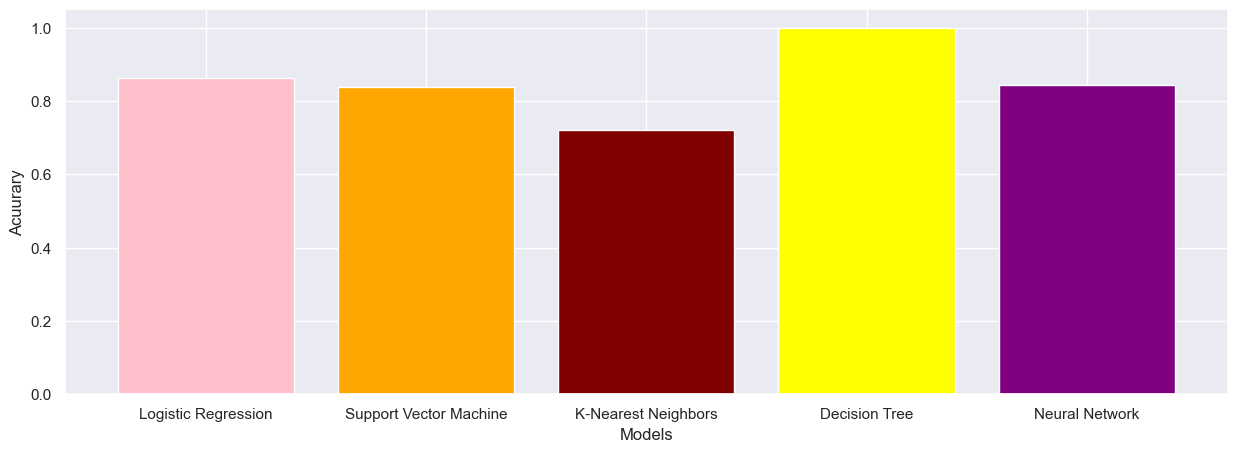

In [125]:
plt.figure(figsize=(15, 5))
plt.bar(*zip(*model_scores.items()), color=["pink", "orange", "maroon", "yellow", "purple"])
plt.xlabel("Models");
plt.ylabel("Acuurary");

Decision tree shows 100% accuracy,
Logistic Regression shows 86% accuracy,
Neural Network shows 84% accuracy,
Support Vector Machine shows 83% accuracy,
K-Nearest Neighbors shows 72% accuracy.